Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


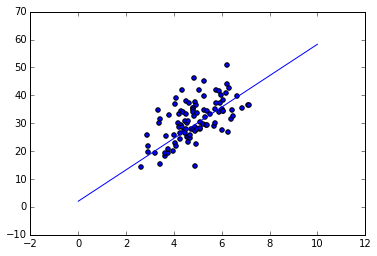

f(x) = x * 5.62538295521 + 2.04391869538 


In [81]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T

# generate data
numSamples = 100
learning_rate = 0.01
training_steps = 10

X = (np.random.randn(1, numSamples) + 5)[0]
X = np.sort(X)
Y = ((X * 4) + 12) + (6 * np.random.randn(1, numSamples)[0])

# setting theano variables up
x = T.vector('x')
y = T.vector('y')
m = theano.shared(0.5, name = "m")
c = theano.shared(1.0, name = "c")

# define cost function
predict = T.dot(x, m) + c
cost = T.sum(T.pow(predict - y, 2))/(2*numSamples)

# gradient descent
gradm = T.grad(cost, m)
gradc = T.grad(cost, c)

# train and cost function
train = theano.function([x, y], cost, updates = [(m, m - learning_rate * gradm), (c, c - learning_rate * gradc)])
test = theano.function([x], predict)

# training
for i in range(training_steps):
    train(X, Y)

a = np.linspace(0, 10, 10)
b = test(a)
    
# plot data
plt.scatter(X, Y)
plt.plot(a, b)
plt.show()

print "f(x) = x * {} + {} ".format(m.get_value(), c.get_value())

In [79]:
test([4, 3, 8.5])

array([ 24.62555929,  18.98024271,  50.02948389])